In [401]:
! python3 -m pip install --upgrade tensorflow

Requirement already up-to-date: tensorflow in /usr/local/lib/python3.6/dist-packages (2.1.0)


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [0]:
fashion = keras.datasets.fashion_mnist

In [0]:
(x_train_full, y_train_full), (x_test, y_test) = fashion.load_data()

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train, x_val , y_train , y_val = train_test_split(x_train_full, y_train_full, test_size=0.15)

1

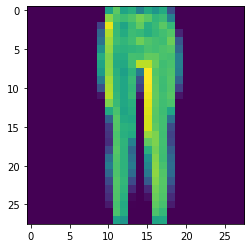

In [536]:
plt.imshow(x_train[431])
y_train[431]


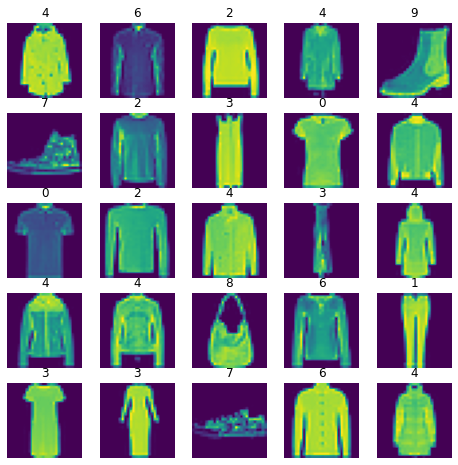

In [537]:
fig = plt.figure(figsize=(8,8))
for i in range(25):
  ax = fig.add_subplot(5,5,i+1, title= '{}'.format(y_train[i]))
  ax.imshow(x_train[i])
  ax.axis('off')


In [0]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

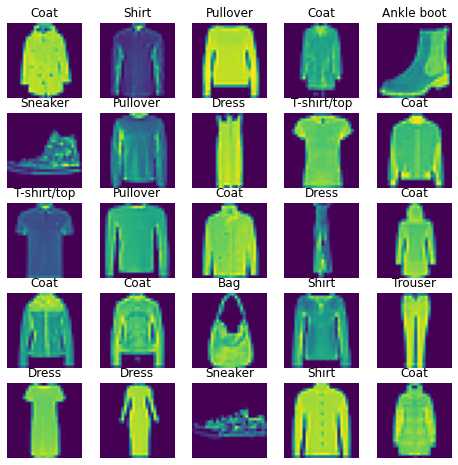

In [539]:
fig = plt.figure(figsize=(8,8))
for i in range(25):
  ax = fig.add_subplot(5,5,i+1, title= '{}'.format(class_names[y_train[i]]))
  ax.imshow(x_train[i])
  ax.axis('off')


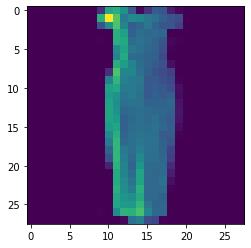

In [540]:
plt.imshow(x_train[142])

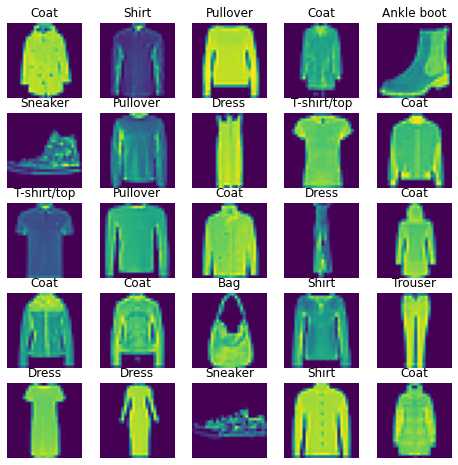

In [541]:
fig = plt.figure(figsize=(8,8))
for i in range(25):
  ax = fig.add_subplot(5,5,i+1, title= '{}'.format(class_names[y_train[i]]))
  ax.imshow(x_train[i])
  ax.axis('off')


In [542]:
x_train[32].shape

(28, 28)

In [0]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation = 'relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(len(class_names), activation='softmax'))

In [544]:
len(class_names)

10

In [545]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_118 (Dense)            (None, 300)               235500    
_________________________________________________________________
dense_119 (Dense)            (None, 100)               30100     
_________________________________________________________________
dense_120 (Dense)            (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [546]:
model.layers

In [547]:
hidden1 = model.layers[1]
hidden1.name

'dense_118'

In [0]:
w,b = hidden1.get_weights()

(array([[-0.01437889,  0.06806232,  0.00498536, ...,  0.03105696,
         -0.0222735 ,  0.00159697],
        [ 0.07006311, -0.03133085,  0.04352339, ...,  0.0123537 ,
          0.03445757,  0.07296082],
        [ 0.07161774, -0.01514164,  0.04402668, ..., -0.02639423,
         -0.0403086 ,  0.02347349],
        ...,
        [ 0.0218265 , -0.02636725, -0.0256583 , ...,  0.07401939,
         -0.07135511, -0.01344975],
        [ 0.0053988 , -0.02631758,  0.071338  , ..., -0.02081285,
          0.05521557,  0.03189608],
        [-0.06203465, -0.03675982,  0.03586446, ..., -0.06707447,
         -0.0281937 , -0.00551601]], dtype=float32), (784, 300))

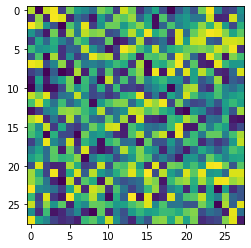

In [549]:
plt.imshow(w[:,5].reshape([28,28]))
w, w.shape


In [550]:
b, b.shape

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics =['accuracy'])

In [552]:
history = model.fit(x_train, y_train, epochs=4, validation_data=(x_val, y_val))

Train on 51000 samples, validate on 9000 samples
Epoch 1/4
51000/51000 [==============================] - 8s 164us/sample - loss: 2.3777 - accuracy: 0.6756 - val_loss: 0.8021 - val_accuracy: 0.7062
Epoch 2/4
51000/51000 [==============================] - 8s 160us/sample - loss: 0.7456 - accuracy: 0.7251 - val_loss: 0.7139 - val_accuracy: 0.7260
Epoch 3/4
51000/51000 [==============================] - 8s 155us/sample - loss: 0.6376 - accuracy: 0.7505 - val_loss: 0.6151 - val_accuracy: 0.7601
Epoch 4/4
51000/51000 [==============================] - 8s 155us/sample - loss: 0.5869 - accuracy: 0.7720 - val_loss: 0.6149 - val_accuracy: 0.7640


In [553]:
history.params

{'batch_size': 32,
 'do_validation': True,
 'epochs': 4,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy'],
 'samples': 51000,
 'steps': 1594,
 'verbose': 0}

In [554]:
history.epoch

[0, 1, 2, 3]

In [555]:
history.history

{'accuracy': [0.67556864, 0.72513723, 0.7504706, 0.7720196],
 'loss': [2.377707375582527,
  0.7455780944450229,
  0.6375583741524641,
  0.5868756482694664],
 'val_accuracy': [0.70622224, 0.726, 0.7601111, 0.764],
 'val_loss': [0.8021307479010688,
  0.7138867845535278,
  0.6151067586474949,
  0.6149017614258661]}

In [0]:
import pandas as pd

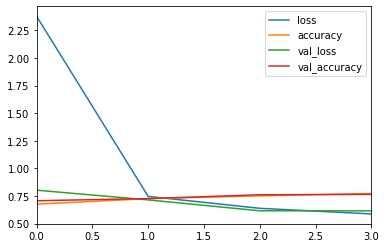

In [557]:
pd.DataFrame(history.history).plot()

In [558]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 74us/sample - loss: 0.6395 - accuracy: 0.7603


[0.63948408203125, 0.7603]

In [0]:
pred = model.predict([x_test[:1]])

In [560]:
pred

array([[5.8574470e-34, 2.2357525e-29, 1.5848646e-38, 9.3724332e-33,
        0.0000000e+00, 4.4310135e-01, 2.1566623e-32, 5.1697195e-01,
        3.1726879e-16, 3.9926689e-02]], dtype=float32)

predicted Sneaker


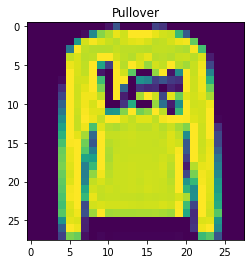

In [561]:
plt.imshow(x_test[1])
plt.title(class_names[y_test[1]])
print('predicted {}'.format(class_names[np.argmax(pred)]))

In [562]:
pred_class = model.predict_classes(x_test[:1])
class_names[pred_class[0]]

'Sneaker'

In [0]:
from sklearn.preprocessing import StandardScaler

In [564]:
test = np.random.randint(14, size=(10,5))
tar = np.random.randint(84,size=(10,1))
test

array([[11,  7,  3,  5,  6],
       [ 7, 11, 13, 11,  3],
       [ 5,  3,  7,  1,  2],
       [ 8,  9, 11,  1, 12],
       [12,  8,  3,  4,  7],
       [ 1,  9,  9,  2, 12],
       [ 3, 11,  7,  0,  6],
       [ 6,  3,  4,  0,  4],
       [11,  8, 12, 13,  3],
       [ 3,  3, 11,  8, 13]])

In [565]:
stsc = StandardScaler()
stsc.fit(test)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [0]:
test_s = stsc.transform(test)


In [567]:
k=3
test_s[:,k].mean(), test_s[:,k].std()

(4.4408920985006264e-17, 1.0)

In [568]:
tar.mean(), tar.std()

(49.8, 20.575713839378697)

In [0]:
test2 = np.random.randint(14,size= (30,5))

In [0]:
test_2_s = stsc.fit_transform(test2)

In [571]:

k=2
test_2_s[:,k].mean(), test_2_s[:,k].std()

(-9.251858538542972e-17, 0.9999999999999998)

## For Regression

In [0]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [0]:
housing = fetch_california_housing()

In [574]:
housing.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [575]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [0]:
x_train, x_test, y_train, y_test = train_test_split(housing['data'], housing['target'])

In [577]:
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

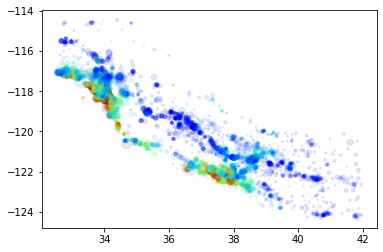

In [578]:
plt.scatter(x_train[:,6], x_train[:,7], alpha=0.1,s=x_train[:,4]/120, c=y_train, cmap='jet')

In [579]:
x_train[:,6].shape

(15480,)

In [580]:
x_train[:,7].shape

(15480,)

In [0]:
X_train, X_val , Y_train, y_val = train_test_split(x_train, y_train, test_size=0.1)

In [582]:
Y_train

array([1.6    , 2.536  , 1.009  , ..., 2.143  , 0.87   , 5.00001])

In [0]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(x_test)
X_val = scaler.transform(X_val)

In [0]:
x_test = scaler.transform(x_test)

In [0]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(8, activation='relu', input_shape=[8]))
model.add(keras.layers.Dense(5, activation='relu'))
model.add(keras.layers.Dense(3, activation='relu'))
model.add(keras.layers.Dense(1))

In [0]:
model.compile(loss ='mean_squared_error',
              optimizer='sgd')

In [587]:
model.fit(X_train, Y_train, epochs=30, validation_data=(X_val, y_val))

Train on 13932 samples, validate on 1548 samples
Epoch 1/30
13932/13932 [==============================] - 1s 70us/sample - loss: 1.5439 - val_loss: 1.3469
Epoch 2/30
13932/13932 [==============================] - 1s 50us/sample - loss: 1.2920 - val_loss: 1.2581
Epoch 3/30
13932/13932 [==============================] - 1s 49us/sample - loss: 0.9171 - val_loss: 0.6571
Epoch 4/30
13932/13932 [==============================] - 1s 50us/sample - loss: 0.5666 - val_loss: 0.5023
Epoch 5/30
13932/13932 [==============================] - 1s 53us/sample - loss: 0.4775 - val_loss: 0.4510
Epoch 6/30
13932/13932 [==============================] - 1s 50us/sample - loss: 0.4429 - val_loss: 0.4237
Epoch 7/30
13932/13932 [==============================] - 1s 49us/sample - loss: 0.4246 - val_loss: 0.4300
Epoch 8/30
13932/13932 [==============================] - 1s 51us/sample - loss: 0.4122 - val_loss: 0.3958
Epoch 9/30
13932/13932 [==============================] - 1s 52us/sample - loss: 0.4032 - val_l

In [588]:
model.evaluate(x_test, y_test)

5160/5160 [==============================] - 0s 42us/sample - loss: 0.3632


0.3631537823714027

In [589]:
model.predict(X_train[:3])

array([[1.4611259],
       [1.5085607],
       [0.7799511]], dtype=float32)

In [0]:
titles = ['ali','fele','paranj']
test = 'ali is '

In [591]:
for i in titles:
  print(test + i)

ali is ali
ali is fele
ali is paranj


In [0]:
X = housing.data
Y = housing.target
x_train_full, x_test, y_train_full, y_test = train_test_split(X,Y,test_size = 0.2)
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size = 0.1)

In [0]:
input_ = keras.layers.Input(shape=[8])
hidden1 = keras.layers.Dense(7, activation='relu')(input_)
hidden2 = keras.layers.Dense(3, activation='relu')(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)

In [0]:
model = keras.Model(inputs=[input_], outputs=[output])

In [0]:
model.compile(optimizer = 'sgd', loss='mean_squared_error')

In [596]:
model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

Train on 14860 samples, validate on 1652 samples
Epoch 1/10
14860/14860 [==============================] - 1s 71us/sample - loss: nan - val_loss: nan
Epoch 2/10
14860/14860 [==============================] - 1s 48us/sample - loss: nan - val_loss: nan
Epoch 3/10
14860/14860 [==============================] - 1s 54us/sample - loss: nan - val_loss: nan
Epoch 4/10
14860/14860 [==============================] - 1s 48us/sample - loss: nan - val_loss: nan
Epoch 5/10
14860/14860 [==============================] - 1s 52us/sample - loss: nan - val_loss: nan
Epoch 6/10
14860/14860 [==============================] - 1s 51us/sample - loss: nan - val_loss: nan
Epoch 7/10
14860/14860 [==============================] - 1s 48us/sample - loss: nan - val_loss: nan
Epoch 8/10
14860/14860 [==============================] - 1s 48us/sample - loss: nan - val_loss: nan
Epoch 9/10
14860/14860 [==============================] - 1s 46us/sample - loss: nan - val_loss: nan
Epoch 10/10
14860/14860 [=================

# Advanced Models

In [0]:
X = housing.data
Y = housing.target

In [0]:
x_train_full, x_test, y_train_full, y_test = train_test_split(X,Y,test_size = 0.2)

In [0]:
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size = 0.1)


In [0]:
scst = StandardScaler()
x_train = scst.fit_transform(x_train)
x_test = scst.transform(x_test)
x_val = scst.transform(x_val)

In [601]:
y_train

array([1.646, 2.173, 1.828, ..., 0.936, 0.485, 1.267])

In [0]:
inputA = keras.layers.Input(shape=[5], name = 'wide_input')
inputB = keras.layers.Input(shape=[6], name='deep_input')
hidden1 = keras.layers.Dense(8, activation = 'relu')(inputB)
hidden2 = keras.layers.Dense(5, activation = 'relu')(hidden1)
concat = keras.layers.Concatenate()([inputA, hidden2])
out = keras.layers.Dense(1)(concat)

In [0]:
model = keras.Model(inputs=[inputA, inputB], outputs=[out])

In [0]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))


In [0]:
x_train_A, x_train_B = x_train[:, :5], x_train[:, 2:]
x_valid_A, x_valid_B = x_val[:, :5], x_val[:, 2:]
x_test_A, x_test_B = x_test[:, :5], x_test[:, 2:]
x_new_A, x_new_B = x_test_A[:3], x_test_B[:3]


In [606]:
x_train_B.shape

(14860, 6)

In [609]:
history = model.fit((x_train_A, x_train_B), y_train, epochs=30, validation_data=((x_valid_A, x_valid_B), y_val))

Train on 14860 samples, validate on 1652 samples
Epoch 1/30
14860/14860 [==============================] - 1s 49us/sample - loss: 0.5593 - val_loss: 0.5462
Epoch 2/30
14860/14860 [==============================] - 1s 46us/sample - loss: 0.5528 - val_loss: 0.5390
Epoch 3/30
14860/14860 [==============================] - 1s 46us/sample - loss: 0.5463 - val_loss: 0.5308
Epoch 4/30
14860/14860 [==============================] - 1s 46us/sample - loss: 0.5399 - val_loss: 0.5236
Epoch 5/30
14860/14860 [==============================] - 1s 47us/sample - loss: 0.5336 - val_loss: 0.5167
Epoch 6/30
14860/14860 [==============================] - 1s 46us/sample - loss: 0.5271 - val_loss: 0.5087
Epoch 7/30
14860/14860 [==============================] - 1s 46us/sample - loss: 0.5212 - val_loss: 0.5032
Epoch 8/30
14860/14860 [==============================] - 1s 48us/sample - loss: 0.5154 - val_loss: 0.4959
Epoch 9/30
14860/14860 [==============================] - 1s 45us/sample - loss: 0.5097 - val_l

In [608]:
model.predict((x_new_A, x_new_B))

array([[2.3983452],
       [1.6350238],
       [1.6112818]], dtype=float32)

In [613]:
model.evaluate((x_test_A, x_test_B), y_test)

4128/4128 [==============================] - 0s 48us/sample - loss: 0.4589


0.4588977383781773